<a href="https://colab.research.google.com/github/sedecasa/AP155/blob/main/Eigenvalue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# reference

def ham(x_pos, pot_array):
  N = len(x_pos)
  dx = x_pos[1] - x_pos[0]
  pot = np.diag(pot_array)
  kin = -((np.eye(N, N, k=+1)) + np.eye(N, N, k=-1) - 2*np.eye(N, N, k=0))/((x_pos[1] - x_pos[0]**2))/2
  ham_matrix = pot + kin
  return ham_matrix

In [4]:
# exercise (a)

N = 100
omega = 0.9
x_pos = np.linspace(-10, 10, N)
harmonic_pot = 0.5*(omega**2)*(x_pos**2)

def ham_mat(x_pos, pot_array):
  N = len(x_pos)
  dx = x_pos[1] - x_pos[0]
  m_diag = np.diag(pot_array + (1/(dx)**2))
  off_diag = -(np.eye(N, N, k=+1) + np.eye(N, N, k=-1))/(2*(dx)**2)
  mat = m_diag + off_diag
  return mat

In [5]:
# exercise (a)

harmonic_setup = ham_mat(x_pos, harmonic_pot)
ho_eigvals, ho_eigvecs = np.linalg.eigh(harmonic_setup)

(0.0, 10.0)

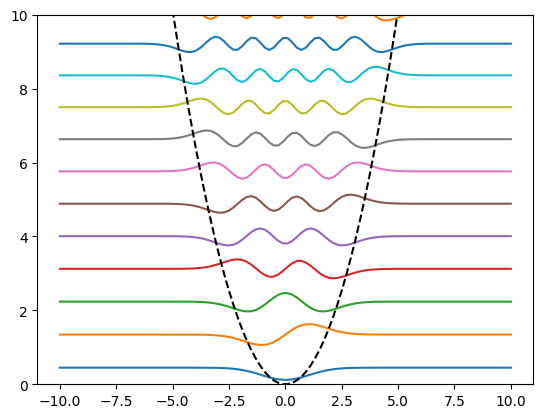

In [7]:
# exercise (a)

for i in range(30):
  plt.plot(x_pos, ho_eigvals[i] + ho_eigvecs[:,i])

plt.plot(x_pos, harmonic_pot, "k--")
plt.ylim(0, 10)

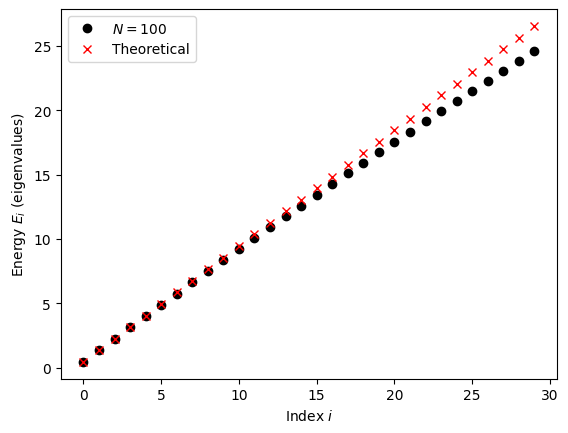

In [9]:
# exercise (a)

plt.plot(ho_eigvals[:30], "ko", label="$N = 100$")
plt.plot(omega*(np.arange(30) + 0.5), "rx", label="Theoretical")
plt.xlabel(r"Index $i$")
plt.ylabel(r"Energy $E_i$ (eigenvalues)")
plt.legend()

In [10]:
# activity

N = 100
x_pos = np.linspace(-10, 10, N)

def ham_mat(x_pos, pot_array):
  N = len(x_pos)
  dx = x_pos[1] - x_pos[0]
  m_diag = np.diag(pot_array + (1/(dx)**2))
  off_diag = -(np.eye(N, N, k=+1) + np.eye(N, N, k=-1))/(2*(dx)**2)
  mat = m_diag + off_diag
  return mat

# let w be the width of each square well
# let g be the gap between the two wells
# let d be the depth of the well

def pot_array(w, g, d):
  pot = np.zeros(N)
  for i in range(N):
    if x_pos[i] <= -g/2 and x_pos[i] >= -g/2 - w:
      pot[i] = -d
    elif x_pos[i] <= g/2 + w and x_pos[i] >= g/2:
      pot[i] = -d
    else:
      pot[i] = 0
  return pot

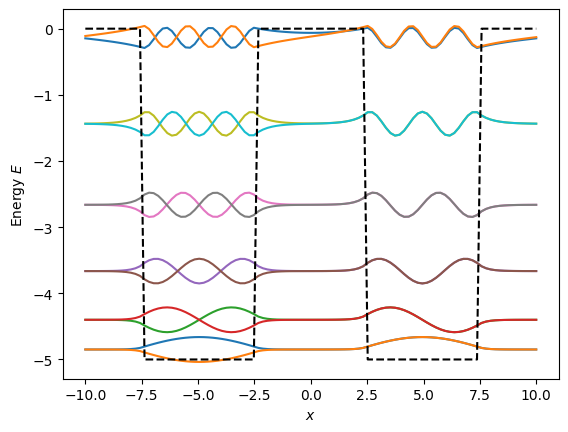

In [12]:
# activity

potential = pot_array(5, 5, 5)
double_well = ham_mat(x_pos, potential)
db_eigvals, db_eigvecs = np.linalg.eigh(double_well)

for i in range(12):
  plt.plot(x_pos, db_eigvals[i] + db_eigvecs[:,i])
plt.xlabel(r"$x$")
plt.ylabel(r"Energy $E$")

plt.plot(x_pos, potential, "k--")

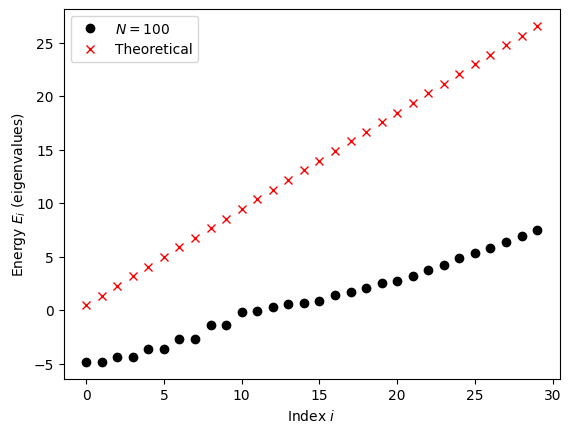

In [13]:
# activity

plt.plot(db_eigvals[:30], "ko", label = "$N = 100$")
plt.plot(omega*(np.arange(30) + 0.5), "rx", label="Theoretical")
plt.xlabel(r"Index $i$")
plt.ylabel(r"Energy $E_i$ (eigenvalues)")
plt.legend()